<a href="https://colab.research.google.com/github/Charith3800/Neural-Networks/blob/main/Home-Assignment1-Task3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 51s 26ms/step - accuracy: 0.9075 - loss: 0.3071 - val_accuracy: 0.9787 - val_loss: 0.0666
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 25ms/step - accuracy: 0.9846 - loss: 0.0498 - val_accuracy: 0.9830 - val_loss: 0.0553
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 48s 25ms/step - accuracy: 0.9900 - loss: 0.0323 - val_accuracy: 0.9864 - val_loss: 0.0419
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 24ms/step - accuracy: 0.9925 - loss: 0.0230 - val_accuracy: 0.9848 - val_loss: 0.0447
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 47s 25ms/step - accuracy: 0.9954 - loss: 0.0143 - val_accuracy: 0.9838 - val_loss: 0.0541
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 24ms/step - accuracy: 0.9967 - loss: 0.0106 - val_accuracy: 0.9866 - val_loss: 0.0451
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 47s 25ms/step - accuracy: 0.9977 - loss: 0.0074 - val_accuracy: 0.9867 - val_loss: 0.0503
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 24ms/step - accuracy: 0.9981 -

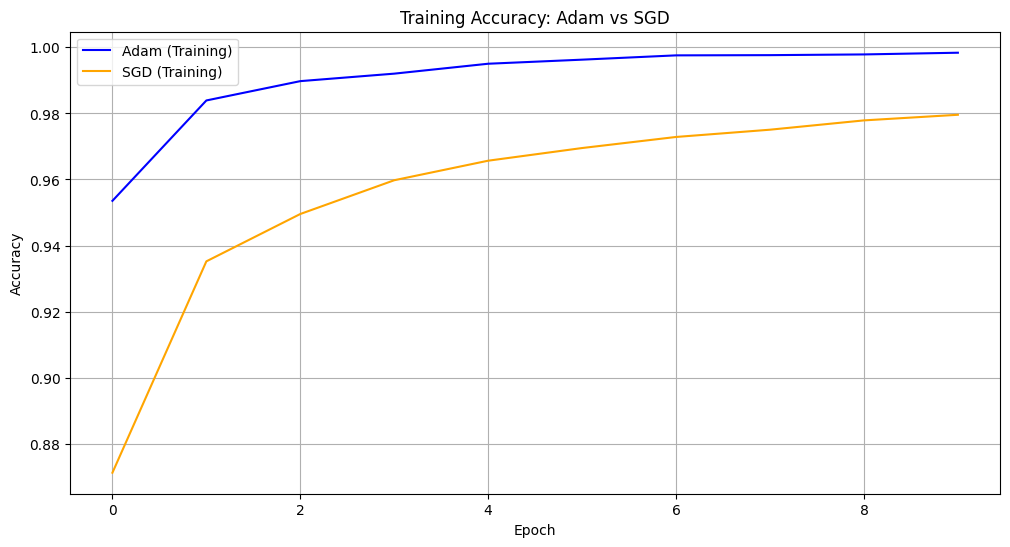

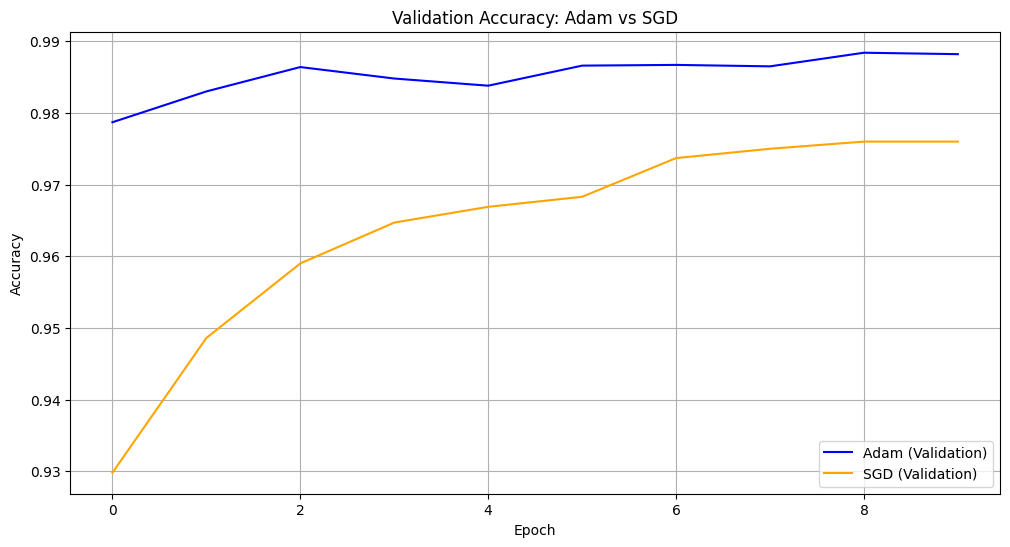

In [3]:
# Step 1: Install TensorFlow (if not already installed)
!pip install tensorflow

# Step 2: Import necessary libraries
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

# Step 3: Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize pixel values to the range [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Reshape the data to add a channel dimension (required for Conv2D layers)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# Convert labels to one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Step 4: Define a simple neural network model
def create_model():
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    return model

# Step 5: Train the model with Adam optimizer
model_adam = create_model()
model_adam.compile(optimizer='adam',
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

history_adam = model_adam.fit(x_train, y_train,
                              epochs=10,
                              validation_data=(x_test, y_test),
                              verbose=1)

# Step 6: Train the model with SGD optimizer
model_sgd = create_model()
model_sgd.compile(optimizer='sgd',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

history_sgd = model_sgd.fit(x_train, y_train,
                            epochs=10,
                            validation_data=(x_test, y_test),
                            verbose=1)

# Step 7: Plot training accuracy separately
plt.figure(figsize=(12, 6))

# Plot training accuracy for Adam and SGD
plt.plot(history_adam.history['accuracy'], label='Adam (Training)', color='blue')
plt.plot(history_sgd.history['accuracy'], label='SGD (Training)', color='orange')
plt.title('Training Accuracy: Adam vs SGD')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

# Step 8: Plot validation accuracy separately
plt.figure(figsize=(12, 6))

# Plot validation accuracy for Adam and SGD
plt.plot(history_adam.history['val_accuracy'], label='Adam (Validation)', color='blue')
plt.plot(history_sgd.history['val_accuracy'], label='SGD (Validation)', color='orange')
plt.title('Validation Accuracy: Adam vs SGD')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()